# Importing the MNIST fashion data set

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model 1: Underfit

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5000 - acc: 0.8235 - val_loss: 0.4554 - val_acc: 0.8369
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3764 - acc: 0.8644 - val_loss: 0.3810 - val_acc: 0.8607
Epoch 3/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3377 - acc: 0.8762 - val_loss: 0.3804 - val_acc: 0.8596
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3148 - acc: 0.8852 - val_loss: 0.3545 - val_acc: 0.8740
Epoch 5/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2951 - acc: 0.8915 - val_loss: 0.3700 - val_acc: 0.8666
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2804 - acc: 0.8972 - val_loss: 0.3443 - val_acc: 0.8781
Epoch 7/20
60000/60000 [===========

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3729 - acc: 0.8826
Test accuracy: 0.8826


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

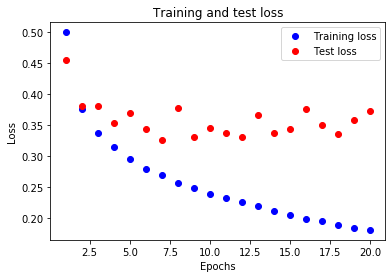

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

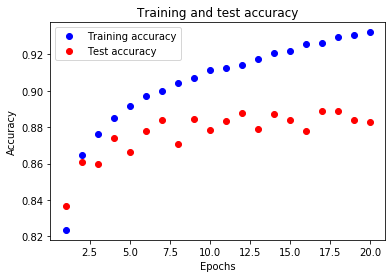

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([2.4003082e-09, 2.1705087e-09, 3.2703357e-13, 4.5102082e-14,
       5.8879903e-13, 4.1183092e-05, 1.1322967e-10, 2.1433579e-03,
       1.9540214e-09, 9.9781549e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

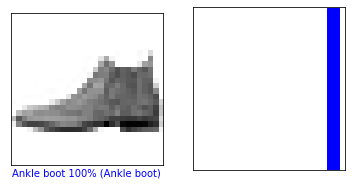

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


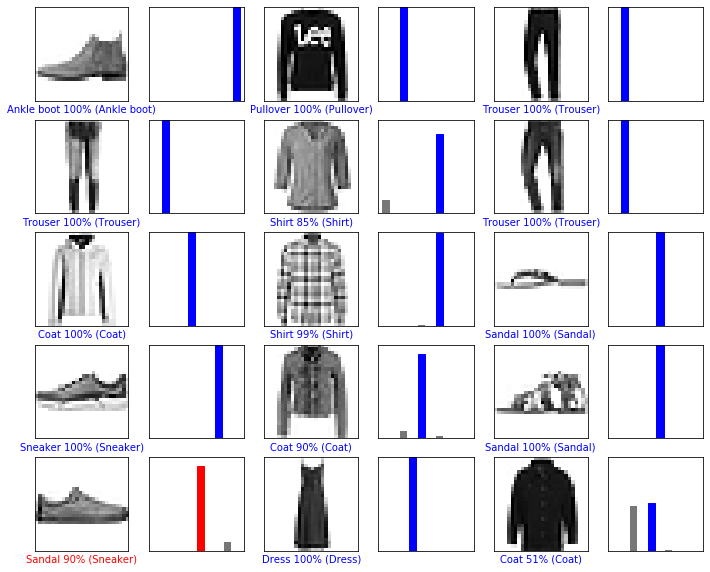

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# Model 2: Overfit

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4755 - acc: 0.8309 - val_loss: 0.4289 - val_acc: 0.8366
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3604 - acc: 0.8679 - val_loss: 0.4129 - val_acc: 0.8520
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3210 - acc: 0.8819 - val_loss: 0.3591 - val_acc: 0.8714
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2991 - acc: 0.8890 - val_loss: 0.3587 - val_acc: 0.8732
Epoch 5/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2810 - acc: 0.8958 - val_loss: 0.3364 - val_acc: 0.8810
Epoch 6/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2668 - acc: 0.9013 - val_loss: 0.3395 - val_acc: 0.8772
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2514 - acc: 0.9060 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.4020 - acc: 0.8811
Test accuracy: 0.8811


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

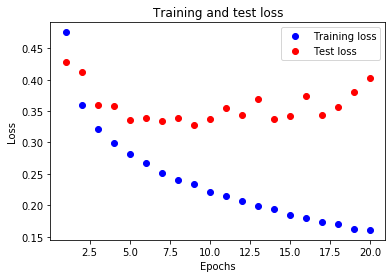

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

Model is Overfitting: The training accuracy keeps increasing at a steady rate, while the test accuracy stagnated after the first few epochs

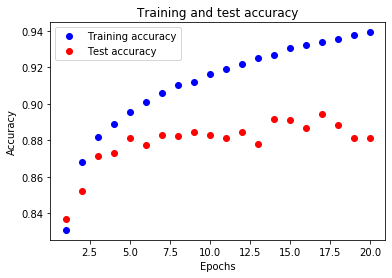

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([6.8377387e-12, 1.9110064e-14, 2.8455127e-14, 8.2905056e-19,
       1.7246319e-16, 4.1847659e-07, 2.2233697e-14, 4.7563782e-04,
       3.2978567e-14, 9.9952400e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

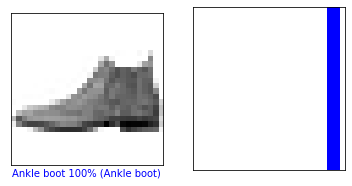

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


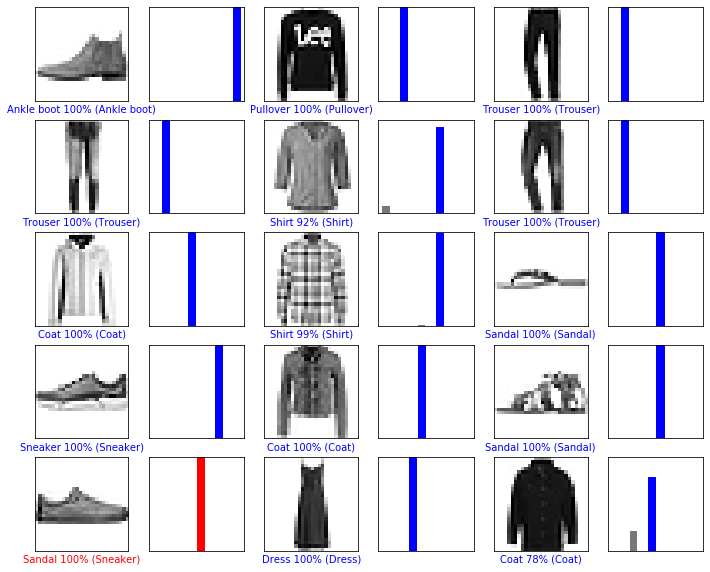

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# Model 3: Decently Fitted

## Build the model

In [0]:
# set up the layers
from keras import layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu, name='Layer1'),
    keras.layers.Dense(128, activation=tf.nn.relu, name='Layer2'),
    keras.layers.Dense(64, activation=tf.nn.relu, name='Layer3'),
    #keras.layers.Dense(512, activation=tf.nn.relu, name='Layer4'),
    keras.layers.Dense(10, activation=tf.nn.softmax, name='output')
])

# using dropout
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

Model is Overfitting: The training accuracy keeps increasing at a steady rate, while the test accuracy stagnated after the first few epochs

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

In [0]:
np.argmax(predictions[index])

In [0]:
test_labels[index]

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
